In [21]:
# Imports - exercise 5
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb


In [11]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()
    
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

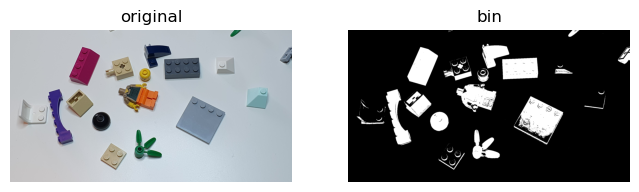

In [15]:
# Read in an image
in_dir = "./data/"
im_name = "lego_4_small.png"

input_img = io.imread(in_dir + im_name)

gray_img = color.rgb2gray(input_img)

thres = threshold_otsu(gray_img)

bin_img = gray_img < thres

plot_comparison(input_img, bin_img, "bin")


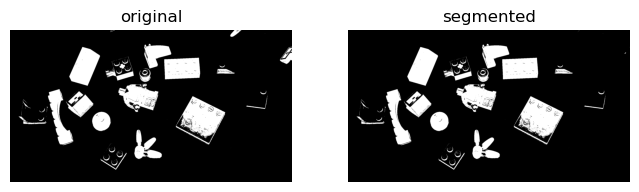

In [23]:
# Exercise 2

segmented = segmentation.clear_border(bin_img)

plot_comparison(bin_img, segmented, "segmented")


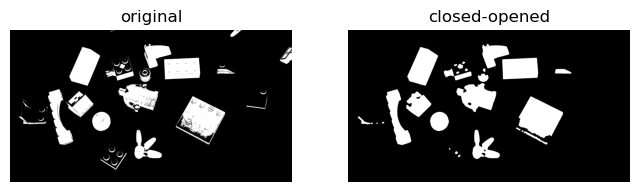

In [26]:
footprint = disk(5)

closed = closing(segmented, footprint)
opened = opening(closed, footprint)

plot_comparison(bin_img, opened, "closed-opened")

Number of labels: 29


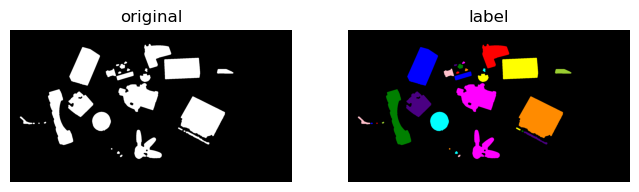

In [30]:
# blob analysis

label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

im_label = label2rgb(label_img)

plot_comparison(opened, im_label, "label")

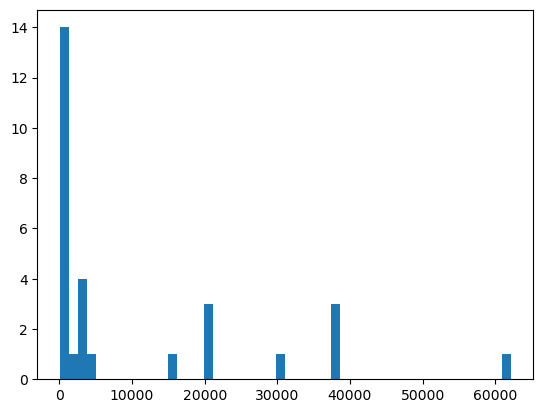

In [32]:
# hist of labels
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

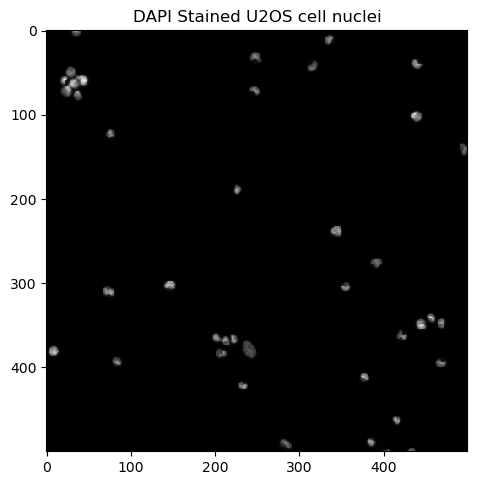

In [34]:
# Cell counting exercise

in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

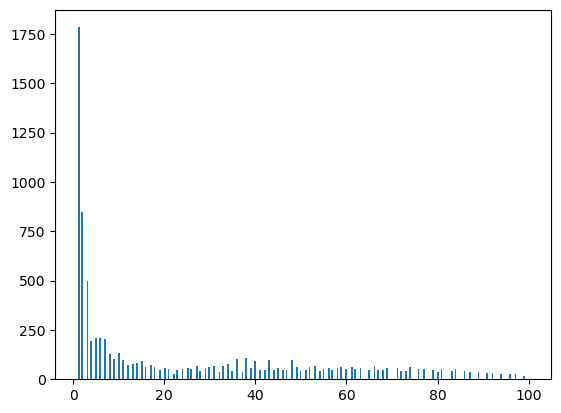

In [35]:
# avoid bin with value 0 due to the very large number of background pixels
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

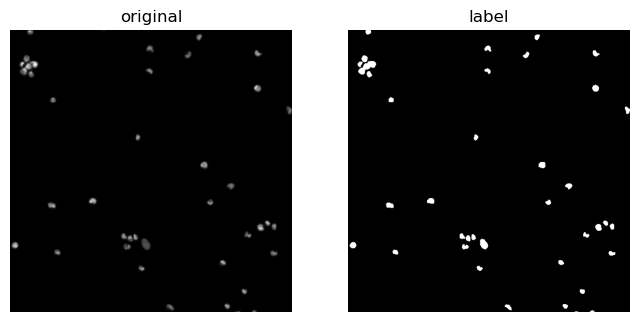

In [39]:
thres = threshold_otsu(img_gray)
bin_img = img_gray > thres

plot_comparison(img_gray, bin_img, "label")

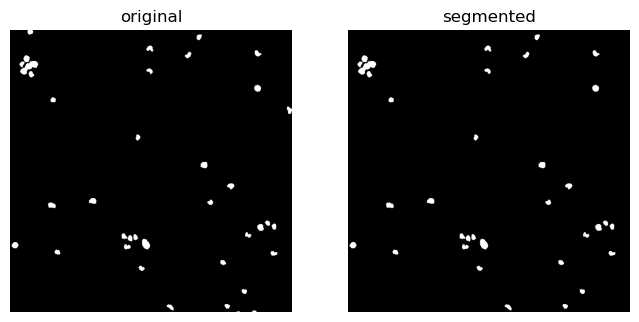

In [42]:
segmented = segmentation.clear_border(bin_img)
plot_comparison(bin_img, segmented, "segmented")

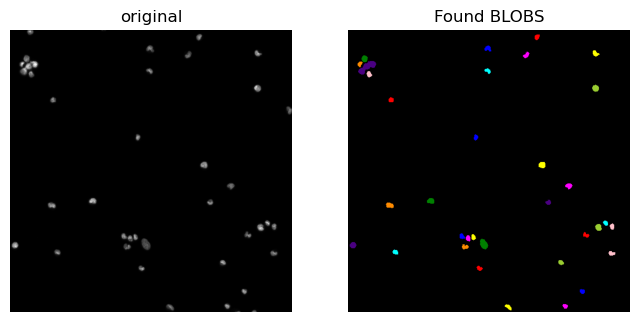

In [76]:
label_img = measure.label(segmented)
image_label_overlay = label2rgb(label_img)
plot_comparison(img_gray, image_label_overlay, 'Found BLOBS')

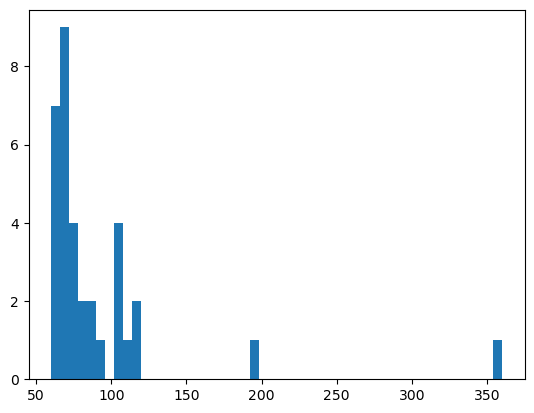

In [77]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

plt.hist(areas, bins=50)
io.show()

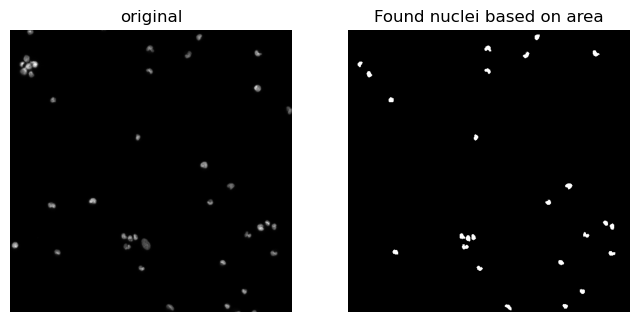

In [80]:
min_area = 50
max_area = 100

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area > max_area or region.area < min_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
plot_comparison(img_small, i_area, 'Found nuclei based on area')

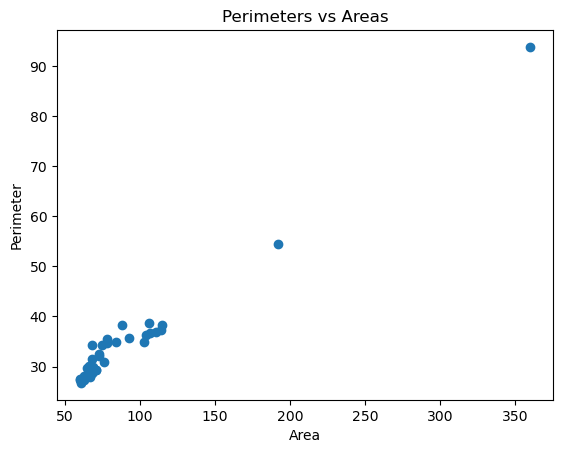

In [85]:
perimeters = np.array([prop.perimeter for prop in region_props])

# Plotting perimeters against areas
plt.scatter(areas, perimeters)
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Perimeters vs Areas')
plt.show()

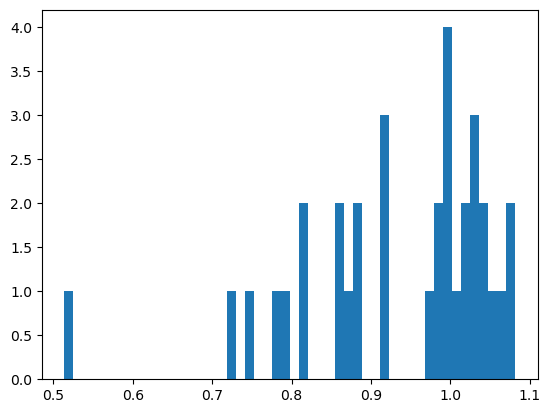

34
29


In [103]:
import math

circularities = [(4 * math.pi * area) / math.pow(perimeter, 2) for area, perimeter in zip(areas, perimeters)]

plt.hist(circularities, bins=50)
io.show()

good_circularity = [circle > 0.8 for circle in circularities]

print(len(circularities))
print(good_circularity.count(True))

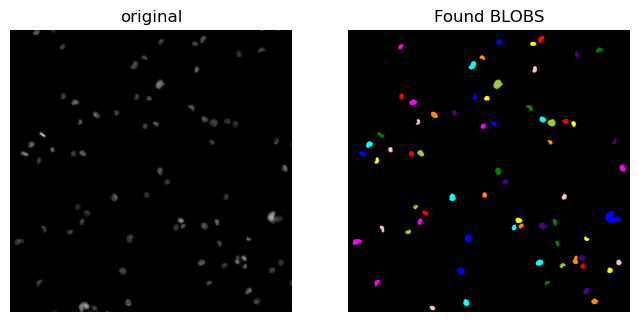

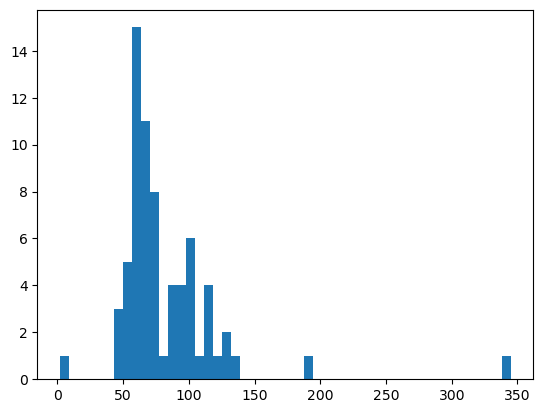

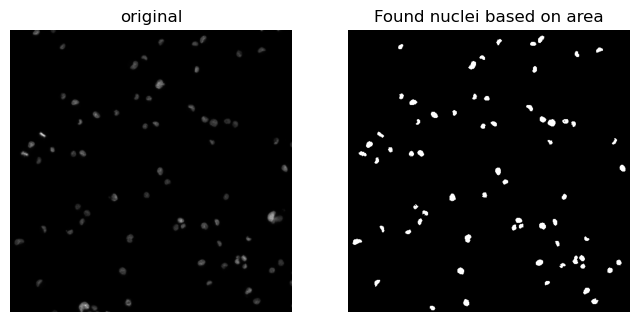

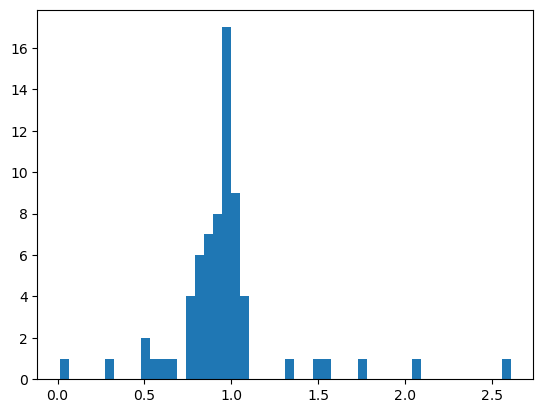

68
43


In [126]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample G1 - COS7 cells DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
# io.imshow(img_gray, vmin=0, vmax=150)
# plt.title('DAPI Stained U2OS cell nuclei')
# io.show()


thres = threshold_otsu(img_gray)
bin_img = img_gray > thres

# plot_comparison(img_gray, bin_img, "label")

segmented = segmentation.clear_border(bin_img)

label_img = measure.label(segmented)
image_label_overlay = label2rgb(label_img)
plot_comparison(img_gray, image_label_overlay, 'Found BLOBS')

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])


perimeters = np.array([prop.perimeter for prop in region_props])
nonzero_indices = np.nonzero(perimeters)
sorted_perimeters = perimeters[nonzero_indices]


plt.hist(areas, bins=50)
io.show()

min_area = 40
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area > max_area or region.area < min_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
plot_comparison(img_small, i_area, 'Found nuclei based on area')

import math



circularities = [(4 * math.pi * area) / math.pow(perimeter, 2) for area, perimeter in zip(areas, sorted_perimeters)]


plt.hist(circularities, bins=50)
io.show()

good_circularity = [circle > 0.9 for circle in circularities]

print(len(circularities))
print(good_circularity.count(True))
